In [10]:
from transformers import AutoTokenizer, EsmModel
from dl_biology.cafa6.helper import extract_data_from_fasta
import pandas as pd
import torch
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# filepaths to fasta
path_to_fasta_train = "/Users/tungvuduc/Desktop/PhD/projects/repos/Deep-learning-for-biology/data/kaggle/cafa-6-protein-function-prediction/Train/train_sequences.fasta"
path_to_fasta_test = "/Users/tungvuduc/Desktop/PhD/projects/repos/Deep-learning-for-biology/data/kaggle/cafa-6-protein-function-prediction/Test/testsuperset.fasta"

# filepath to GO terms
path_to_go_term_train = "/Users/tungvuduc/Desktop/PhD/projects/repos/Deep-learning-for-biology/data/kaggle/cafa-6-protein-function-prediction/Train/train_terms.tsv"

In [6]:
# let's read the data
train_terms = pd.read_csv(path_to_go_term_train, delimiter="\t")
train_terms

,EntryID,term,aspect
0,Q5W0B1,GO:0000785,C
1,Q5W0B1,GO:0004842,F
2,Q5W0B1,GO:0051865,P
3,Q5W0B1,GO:0006275,P
4,Q5W0B1,GO:0006513,P
...,...,...,...
537022,Q06667,GO:0070481,P
537023,B1NF19,GO:0033075,P
537024,B1NF19,GO:0047052,F
537025,B1NF19,GO:0047056,F


<Axes: xlabel='length', ylabel='Count'>

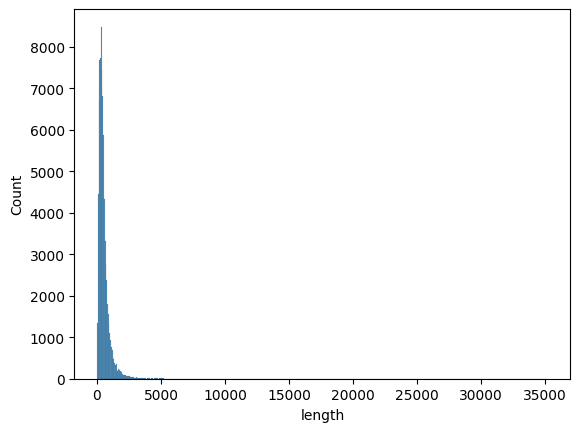

In [11]:
sns.histplot(extract_data_from_fasta(path_to_fasta_train)["length"])

In [ ]:
model_checkpoint = "facebook/esm2_t33_650M_UR50D"
model = EsmModel.from_pretrained(model_checkpoint)
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
sequences = extract_data_from_fasta(path_to_fasta_train)["sequence"].tolist()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:

class FastaSequenceDataset(nn.Dataset)

In [45]:
model_checkpoint = "facebook/esm2_t33_650M_UR50D"
model = EsmModel.from_pretrained(model_checkpoint)
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
sequences = extract_data_from_fasta(path_to_fasta_train)["sequence"].tolist()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_embeddings_dict, hidden_embeddings_dict = process_fasta_to_both_embeddings(
    fasta_path=path_to_fasta_train, 
    model=model, 
    tokenizer=tokenizer, 
    device=device,
    input_output_path=None,
    hidden_output_path=None,
    input_batch_size=1000,
    hidden_batch_size=32,
    force_recompute=False
)

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t33_650M_UR50D and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Extracting sequences from FASTA...
Computing input embeddings for 82404 sequences...


Processing batches:  40%|███▉      | 33/83 [01:04<01:38,  1.96s/it]

: 